C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.4262 - loss: 0.8070 - val_accuracy: 0.4898 - val_loss: 0.7297
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4286 - loss: 0.7020 - val_accuracy: 0.5102 - val_loss: 0.6692
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6313 - loss: 0.6318 - val_accuracy: 0.6122 - val_loss: 0.6235
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7278 - loss: 0.5924 - val_accuracy: 0.6939 - val_loss: 0.5875
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8069 - loss: 0.5546 - val_accuracy: 0.7143 - val_loss: 0.5571
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7963 - loss: 0.5258 - val_accuracy: 0.7959 - val_loss: 0.5288
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7760 - loss: 0.5132 - val_accuracy: 0.7959 - val_loss: 0.5030
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8344 - loss: 0.4686 - val_accuracy: 0.7959 - v

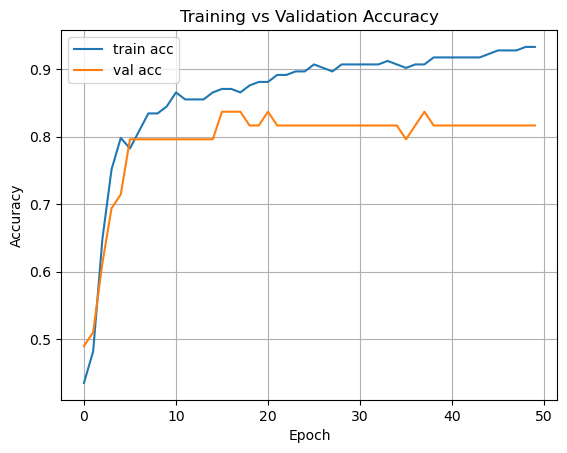

In [1]:
#  1. 라이브러리 불러오기
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

#  2. 데이터 불러오기
df = pd.read_csv("heart.csv")

#  3. 입력(X), 출력(y) 분리
X = df.drop("target", axis=1)
y = df["target"]

#  4. 데이터 분할 (학습/테스트)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  5. 입력 정규화 (스케일링)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  6. 딥러닝 모델 만들기 (Keras Sequential)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 이진 분류는 sigmoid!
])

#  7. 컴파일 (loss, optimizer, metric 설정)
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 8. 모델 학습
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

#  9. 모델 평가
loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n✅ 테스트 정확도: {acc:.4f}")

#  10. 예측 및 리포트 출력
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
print("\n📊 분류 리포트:")
print(classification_report(y_test, y_pred))

#  11. 학습 시각화 (선택)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
